# Final Project - Support Vector Machines 

In [45]:
import numpy as np
from numpy import random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [46]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = -1.0
    y[y==3] = 0.0
    y[y>3] = 1.0
    print(f'Current y hist: {np.histogram(y, [-1.5, -0.5, 0.5, 1.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = 3

    print(f'The shape of the wines dataset: {data.shape}')
    print(f'y[:10]:\n{y[:10]}')
    print(f'X[:10, :]:\n{X[:10, :]}')

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(f'ScaledX[:10, :]:\n{X[:10, :]}') # Look at the new features after scaling

    # Split the data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    return X_train, y_train, X_test, y_test

### Confusion Matrix and Classification Analysis

In [47]:
def confusion_and_classification(y, y_hat, title):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(-1, 2))
    disp.plot(cmap='winter')
    plt.title(title)
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0)
    # accuracy
    print(cr[: cr.find('accuracy') - 6])
    print(f'\t\t R2 Score: {r2_score(y, y_hat)}\n')

# SVM using Linear Kernel.

In [48]:
def svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear, Y_hat_test_linear):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)
    
    # Fit the classifier on the training set
    svc_linear.fit(X_train, y_train)

    acc_train = svc_linear.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    #print(f'SVM - Linear, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(X_train)

    acc_test = svc_linear.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    #print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    Y_hat_test_linear.append(Yhat_svc_linear_test)
    #confusion_and_classification(y_test, Yhat_svc_linear_test, f'C={c}')

# SVM using Radial Basis Function (RBF) Kernel.

In [49]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf, Y_hat_test_rbf):
    # Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, random_state=24)
    
    # Fit the classifier on the training set
    svc_rbf.fit(X_train, y_train)

    acc_train = svc_rbf.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    #print(f'SVM - RBF, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_rbf_train)

    acc_test = svc_rbf.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    #print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    Y_hat_test_rbf.append(Yhat_svc_rbf_test)
    #confusion_and_classification(y_test, Yhat_svc_rbf_test, f'C={c}')

# SVM using Polynomial Kernel.

In [50]:
def svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly, Y_hat_test_poly):
    # Create an object of svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    # Fit the classifier on the training set
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(X_train, y_train)

    acc_train = svc_polynomial.score(X_train, y_train)
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    #print(f'SVM - Poly, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_poly_train)

    acc_test = svc_polynomial.score(X_test, y_test)
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    #print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    Y_hat_test_poly.append(Yhat_svc_poly_test)
    #confusion_and_classification(y_test, Yhat_svc_poly_test, f'C={c}')

In [51]:
def find_best_test(acc_train_svm, acc_test_svm, Y_hat_test_svm, cvals):
    
    max_test = max(acc_test_svm)
    max_test_ind = acc_test_svm.index(max_test) 
    train = acc_train_svm[max_test_ind]
    Y_hat = Y_hat_test_svm[max_test_ind]
    best_c = cvals[max_test_ind]
    return train, max_test, Y_hat, best_c  

In [52]:
def train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly):
    # Linear
    acc_train_svm_linear = []
    acc_test_svm_linear = []
    Y_hat_test_linear = []
    
    for i, c in enumerate(c_svm_linear):
        svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear, Y_hat_test_linear)
        if i % 10 == 0:
            print(f'SVM - Linear Kernel, C={c}, Train Accuracy = {acc_train_svm_linear[i]}, Test Accuracy = {acc_test_svm_linear[i]}')

    train_linear, test_linear, Y_hat_linear, best_c_linear = find_best_test(acc_train_svm_linear, acc_test_svm_linear, Y_hat_test_linear, c_svm_linear)
    print(f'Best: SVM - Linear Kernel, Train Accuracy = {train_linear}, C={best_c_linear}')
    print(f'Test Accuracy = {test_linear}')
    confusion_and_classification(y_test, Y_hat_linear, f'C={best_c_linear}')
    
    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_linear, acc_train_svm_linear, color='red', label='Training Accuracy')
    plt.plot(c_svm_linear, acc_test_svm_linear, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Linear - Training and Test Accuracy vs c Parameter')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Radial Basis Function
    acc_train_svm_rbf = []
    acc_test_svm_rbf = []
    Y_hat_test_rbf = []
    
    for i, c in enumerate(c_svm_rbf):
        svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf, Y_hat_test_rbf)
        if i % 10 == 0:
            print(f'SVM - RBF Kernel, C={c}, Train Accuracy = {acc_train_svm_rbf[i]}, Test Accuracy = {acc_test_svm_rbf[i]}')

    train_rbf, test_rbf, Y_hat_rbf, best_c_rbf = find_best_test(acc_train_svm_rbf, acc_test_svm_rbf, Y_hat_test_rbf, c_svm_rbf)
    print(f'Best: SVM - RBF Kernel, Train Accuracy = {train_rbf}, C={best_c_rbf}')
    print(f'Test Accuracy = {test_rbf}')
    confusion_and_classification(y_test, Y_hat_rbf, f'C={best_c_rbf}')
    
    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_rbf, acc_train_svm_rbf, color='red', label='Training Accuracy')
    plt.plot(c_svm_rbf, acc_test_svm_rbf, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('RBF - Training and Test Accuracy vs c Parameter')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



    # # Poly
    acc_train_svm_poly = []
    acc_test_svm_poly = []
    Y_hat_test_poly = []
    
    for i, c in enumerate(c_svm_poly):
        svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly, Y_hat_test_poly)
        if i % 10 == 0:
            print(f'SVM - Poly Kernel, C={c}, Train Accuracy = {acc_train_svm_poly[i]}, Test Accuracy = {acc_test_svm_poly[i]}')

    train_poly, test_poly, Y_hat_poly, best_c_poly = find_best_test(acc_train_svm_poly, acc_test_svm_poly, Y_hat_test_poly, c_svm_poly)
    print(f'Best: SVM - Poly Kernel, Train Accuracy = {train_poly}, C={best_c_poly}')
    print(f'Test Accuracy = {test_poly}')
    confusion_and_classification(y_test, Y_hat_poly, f'C={best_c_poly}')

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_poly, acc_train_svm_poly, color='red', label='Training Accuracy')
    plt.plot(c_svm_poly, acc_test_svm_poly, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Poly - Training and Test Accuracy vs c Parameter')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [53]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [54]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[ 1. -1.  0.  0.  0.  1.  0. -1.  0. -1.]
X[:10, :]:
[[6.4000e+00 5.7000e-01 1.2000e-01 2.3000e+00 1.2000e-01 2.5000e+01
  3.6000e+01 9.9519e-01 3.4700e+00 7.1000e-01 1.1300e+01]
 [7.3000e+00 5.8000e-01 3.0000e-01 2.4000e+00 7.4000e-02 1.5000e+01
  5.5000e+01 9.9680e-01 3.4600e+00 5.9000e-01 1.0200e+01]
 [7.0000e+00 3.6000e-01 2.1000e-01 2.3000e+00 8.6000e-02 2.0000e+01
  6.5000e+01 9.9558e-01 3.4000e+00 5.4000e-01 1.0100e+01]
 [7.6000e+00 5.4000e-01 2.0000e-02 1.7000e+00 8.5000e-02 1.7000e+01
  3.1000e+01 9.9589e-01 3.3700e+00 5.1000e-01 1.0400e+01]
 [9.7000e+00 2.9500e-01 4.0000e-01 1.5000e+00 7.3000e-02 1.4000e+01
  2.1000e+01 9.9556e-01 3.1400e+00 5.1000e-01 1.0900e+01]
 [6.6000e+00 8.4000e-01 3.0000e-02 2.3000e+00 5.9000e-02 3.2000e+

SVM - Linear Kernel, C=0.06, Train Accuracy = 0.616106333072713, Test Accuracy = 0.615625
SVM - Linear Kernel, C=2.0885714285714285, Train Accuracy = 0.6215793588741204, Test Accuracy = 0.61875
SVM - Linear Kernel, C=4.1171428571428565, Train Accuracy = 0.6223612197028929, Test Accuracy = 0.61875
SVM - Linear Kernel, C=6.145714285714285, Train Accuracy = 0.6215793588741204, Test Accuracy = 0.615625
SVM - Linear Kernel, C=8.174285714285714, Train Accuracy = 0.6200156372165755, Test Accuracy = 0.61875
Best: SVM - Linear Kernel, Train Accuracy = 0.6223612197028929, C=0.4657142857142857
Test Accuracy = 0.628125


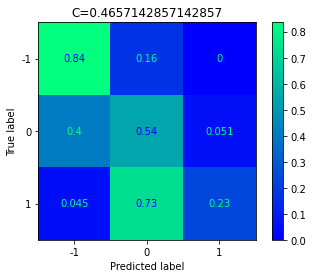

              precision    recall  f1-score   support

        -1.0       0.67      0.84      0.75       140
         0.0       0.57      0.54      0.56       136
         1.0       0.59      0.23      0.33        44
		 R2 Score: 0.19458762886597936



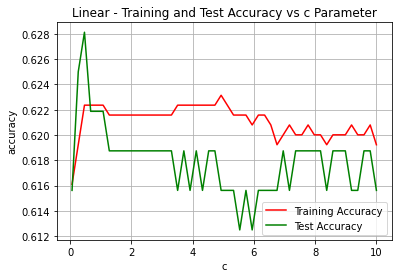

SVM - RBF Kernel, C=1.0, Train Accuracy = 0.7021110242376857, Test Accuracy = 0.678125
SVM - RBF Kernel, C=62.0204081632653, Train Accuracy = 0.9046129788897577, Test Accuracy = 0.675
SVM - RBF Kernel, C=123.0408163265306, Train Accuracy = 0.9366692728694292, Test Accuracy = 0.678125
SVM - RBF Kernel, C=184.0612244897959, Train Accuracy = 0.946051602814699, Test Accuracy = 0.684375
SVM - RBF Kernel, C=245.0816326530612, Train Accuracy = 0.9585613760750586, Test Accuracy = 0.665625
Best: SVM - RBF Kernel, Train Accuracy = 0.7920250195465207, C=7.1020408163265305
Test Accuracy = 0.690625


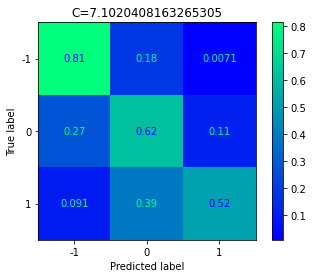

              precision    recall  f1-score   support

        -1.0       0.74      0.81      0.77       140
         0.0       0.67      0.62      0.64       136
         1.0       0.59      0.52      0.55        44
		 R2 Score: 0.26546391752577314



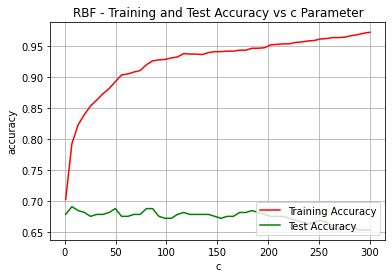

SVM - Poly Kernel, C=0.1, Train Accuracy = 0.5832681782642689, Test Accuracy = 0.5625
SVM - Poly Kernel, C=61.30408163265306, Train Accuracy = 0.8084440969507428, Test Accuracy = 0.6375
SVM - Poly Kernel, C=122.50816326530611, Train Accuracy = 0.8311180609851446, Test Accuracy = 0.628125
SVM - Poly Kernel, C=183.71224489795915, Train Accuracy = 0.8475371383893667, Test Accuracy = 0.61875
SVM - Poly Kernel, C=244.91632653061222, Train Accuracy = 0.8584831899921814, Test Accuracy = 0.61875
Best: SVM - Poly Kernel, Train Accuracy = 0.7576231430805317, C=6.220408163265305
Test Accuracy = 0.653125


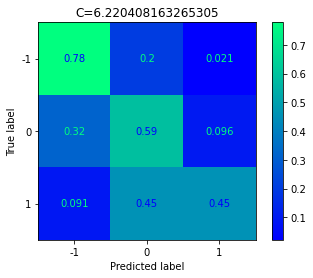

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       140
         0.0       0.62      0.59      0.61       136
         1.0       0.56      0.45      0.50        44
		 R2 Score: 0.14948453608247414



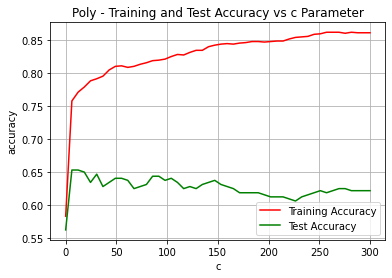

In [55]:
c_svm_linear = np.linspace(0.06, 10)
c_svm_rbf = np.linspace(1, 300)
c_svm_poly = np.linspace(0.1, 300)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train White Wines Data

In [56]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_white)

Original y hist: (array([   0,    0,    0,   20,  163, 1457, 2198,  880,  180]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([1640, 2198, 1060]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (4898, 12)
y[:10]:
[ 0.  0.  0. -1.  0. -1.  1.  1.  0.  0.]
X[:10, :]:
[[6.60000000e+00 2.60000000e-01 5.20000000e-01 8.20000000e+00
  4.70000000e-02 5.20000000e+01 1.91000000e+02 9.95410000e-01
  3.16000000e+00 4.70000000e-01 9.50000000e+00]
 [8.20000000e+00 2.70000000e-01 4.30000000e-01 1.60000000e+00
  3.50000000e-02 3.10000000e+01 1.28000000e+02 9.91600000e-01
  3.10000000e+00 5.00000000e-01 1.23000000e+01]
 [8.10000000e+00 1.20000000e-01 3.80000000e-01 9.00000000e-01
  3.40000000e-02 3.60000000e+01 8.60000000e+01 9.90260000e-01
  2.80000000e+00 5.50000000e-01 1.20000000e+01]
 [6.70000000e+00 5.00000000e-01 3.60000000e-01 1.15000000e+01
  9.60000000e-02 1.80000000e+01 9.20000000e+01 9.96420000e-01
  3.11000000e+00 4.90000000e-01 9.6

SVM - Linear Kernel, C=0.06, Train Accuracy = 0.557427258805513, Test Accuracy = 0.5653061224489796
SVM - Linear Kernel, C=2.0885714285714285, Train Accuracy = 0.5788667687595712, Test Accuracy = 0.5836734693877551
SVM - Linear Kernel, C=4.1171428571428565, Train Accuracy = 0.5783563042368556, Test Accuracy = 0.5857142857142857
SVM - Linear Kernel, C=6.145714285714285, Train Accuracy = 0.5778458397141398, Test Accuracy = 0.5857142857142857
SVM - Linear Kernel, C=8.174285714285714, Train Accuracy = 0.5783563042368556, Test Accuracy = 0.5836734693877551
Best: SVM - Linear Kernel, Train Accuracy = 0.5781010719754976, C=3.3057142857142856
Test Accuracy = 0.5857142857142857


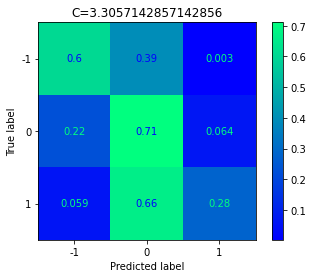

              precision    recall  f1-score   support

        -1.0       0.64      0.60      0.62       328
         0.0       0.55      0.71      0.62       450
         1.0       0.65      0.28      0.39       202
		 R2 Score: 0.1339042428960684



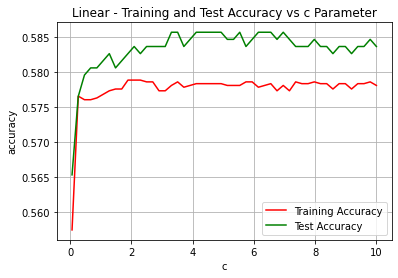

SVM - RBF Kernel, C=1.0, Train Accuracy = 0.6638591117917305, Test Accuracy = 0.613265306122449
SVM - RBF Kernel, C=62.0204081632653, Train Accuracy = 0.8614088820826953, Test Accuracy = 0.6591836734693878
SVM - RBF Kernel, C=123.0408163265306, Train Accuracy = 0.9009698825931598, Test Accuracy = 0.6642857142857143
SVM - RBF Kernel, C=184.0612244897959, Train Accuracy = 0.9147524247064829, Test Accuracy = 0.6612244897959184
SVM - RBF Kernel, C=245.0816326530612, Train Accuracy = 0.9252169474221542, Test Accuracy = 0.6591836734693878
Best: SVM - RBF Kernel, Train Accuracy = 0.9042879019908117, C=135.24489795918367
Test Accuracy = 0.6653061224489796


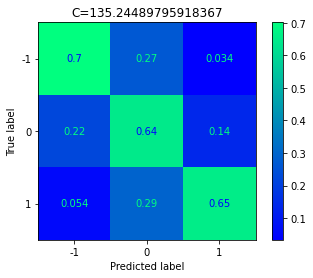

              precision    recall  f1-score   support

        -1.0       0.68      0.70      0.69       328
         0.0       0.67      0.64      0.65       450
         1.0       0.65      0.65      0.65       202
		 R2 Score: 0.2331646555079797



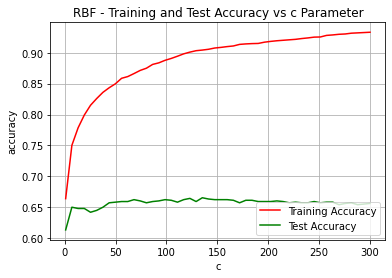

SVM - Poly Kernel, C=0.1, Train Accuracy = 0.5454313425216948, Test Accuracy = 0.5336734693877551
SVM - Poly Kernel, C=61.30408163265306, Train Accuracy = 0.6653905053598775, Test Accuracy = 0.5806122448979592
SVM - Poly Kernel, C=122.50816326530611, Train Accuracy = 0.6702399183256764, Test Accuracy = 0.5724489795918367
SVM - Poly Kernel, C=183.71224489795915, Train Accuracy = 0.6743236345074017, Test Accuracy = 0.5806122448979592
SVM - Poly Kernel, C=244.91632653061222, Train Accuracy = 0.6722817764165391, Test Accuracy = 0.576530612244898
Best: SVM - Poly Kernel, Train Accuracy = 0.6391015824400205, C=6.220408163265305
Test Accuracy = 0.5816326530612245


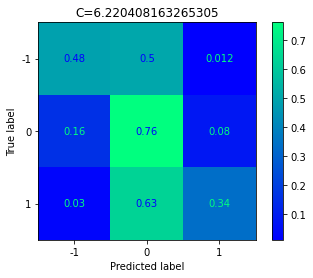

              precision    recall  f1-score   support

        -1.0       0.67      0.48      0.56       328
         0.0       0.54      0.76      0.63       450
         1.0       0.63      0.34      0.44       202
		 R2 Score: 0.14363565589723615



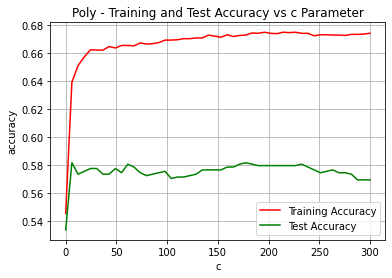

In [57]:
train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train All Wines Data

In [58]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_all)

Original y hist: (array([   0,    0,    0,   30,  216, 2138, 2836, 1079,  198]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([2384, 2836, 1277]), array([-1.5, -0.5,  0.5,  1.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (6497, 12)
y[:10]:
[ 0.  0.  1. -1.  0. -1. -1.  1.  1. -1.]
X[:10, :]:
[[7.60000000e+00 1.70000000e-01 2.70000000e-01 4.60000000e+00
  5.00000000e-02 2.30000000e+01 9.80000000e+01 9.94220000e-01
  3.08000000e+00 4.70000000e-01 9.50000000e+00]
 [1.15000000e+01 3.10000000e-01 5.10000000e-01 2.20000000e+00
  7.90000000e-02 1.40000000e+01 2.80000000e+01 9.98200000e-01
  3.03000000e+00 9.30000000e-01 9.80000000e+00]
 [6.10000000e+00 1.60000000e-01 3.40000000e-01 6.10000000e+00
  3.40000000e-02 3.10000000e+01 1.14000000e+02 9.93650000e-01
  3.32000000e+00 5.80000000e-01 1.01333333e+01]
 [6.70000000e+00 4.70000000e-01 3.40000000e-01 8.90000000e+00
  4.30000000e-02 3.10000000e+01 1.72000000e+02 9.96400000e-01
  3.22000000e+00 6.00000000e-01 9.2

SVM - Linear Kernel, C=0.06, Train Accuracy = 0.5618626130459881, Test Accuracy = 0.5638461538461539
SVM - Linear Kernel, C=2.0885714285714285, Train Accuracy = 0.5618626130459881, Test Accuracy = 0.5646153846153846
SVM - Linear Kernel, C=4.1171428571428565, Train Accuracy = 0.5618626130459881, Test Accuracy = 0.5646153846153846
SVM - Linear Kernel, C=6.145714285714285, Train Accuracy = 0.562055031749086, Test Accuracy = 0.5646153846153846
SVM - Linear Kernel, C=8.174285714285714, Train Accuracy = 0.5618626130459881, Test Accuracy = 0.5646153846153846
Best: SVM - Linear Kernel, Train Accuracy = 0.562055031749086, C=0.26285714285714284
Test Accuracy = 0.5646153846153846


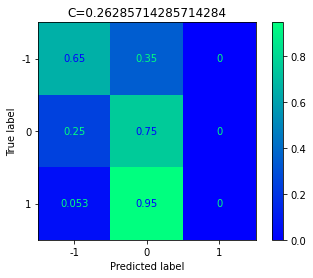

              precision    recall  f1-score   support

        -1.0       0.67      0.65      0.66       479
         0.0       0.50      0.75      0.60       559
         1.0       0.00      0.00      0.00       262
		 R2 Score: 0.1373166224810659



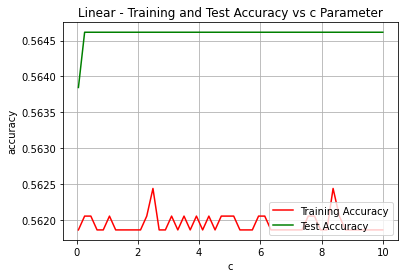

SVM - RBF Kernel, C=1.0, Train Accuracy = 0.659996151625938, Test Accuracy = 0.61
SVM - RBF Kernel, C=62.0204081632653, Train Accuracy = 0.7975755243409659, Test Accuracy = 0.6330769230769231
SVM - RBF Kernel, C=123.0408163265306, Train Accuracy = 0.8416394073503944, Test Accuracy = 0.6346153846153846
SVM - RBF Kernel, C=184.0612244897959, Train Accuracy = 0.8616509524725804, Test Accuracy = 0.6392307692307693
SVM - RBF Kernel, C=245.0816326530612, Train Accuracy = 0.875889936501828, Test Accuracy = 0.6392307692307693
Best: SVM - RBF Kernel, Train Accuracy = 0.7723686742351357, C=31.51020408163265
Test Accuracy = 0.6515384615384615


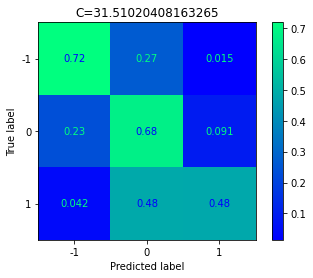

              precision    recall  f1-score   support

        -1.0       0.71      0.72      0.71       479
         0.0       0.60      0.68      0.63       559
         1.0       0.68      0.48      0.56       262
		 R2 Score: 0.2806242230228625



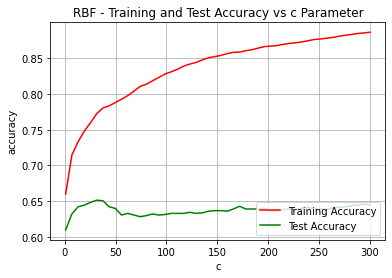

SVM - Poly Kernel, C=0.1, Train Accuracy = 0.5460842793919569, Test Accuracy = 0.5338461538461539
SVM - Poly Kernel, C=61.30408163265306, Train Accuracy = 0.6638445256878969, Test Accuracy = 0.5907692307692308
SVM - Poly Kernel, C=122.50816326530611, Train Accuracy = 0.666730806234366, Test Accuracy = 0.5907692307692308
SVM - Poly Kernel, C=183.71224489795915, Train Accuracy = 0.6728882047335001, Test Accuracy = 0.5907692307692308
SVM - Poly Kernel, C=244.91632653061222, Train Accuracy = 0.6750048104675774, Test Accuracy = 0.59
Best: SVM - Poly Kernel, Train Accuracy = 0.6623051760631133, C=67.42448979591836
Test Accuracy = 0.5930769230769231


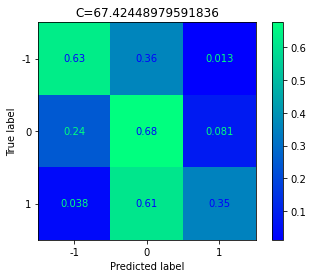

              precision    recall  f1-score   support

        -1.0       0.67      0.63      0.65       479
         0.0       0.53      0.68      0.60       559
         1.0       0.64      0.35      0.45       262
		 R2 Score: 0.1813021236374589



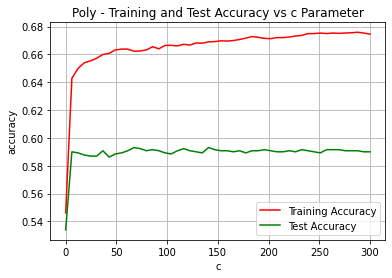

In [59]:
train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)